# Overview

### The data has been split into two groups:

> training set (train.csv)
> test set (test.csv)

* The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.


* The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.


* We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

### Data Dictionary

* Variable  --->	Definition    --->	Key
* survival  --->	Survival      --->    0 = No, 1 = Yes
* pclass    --->	Ticket class  --->	1 = 1st, 2 = 2nd, 3 = 3rd
* sex       --->	Sex	
* Age       --->	Age in years	
* sibsp     --->	# of siblings / spouses aboard the Titanic	
* parch     --->	# of parents / children aboard the Titanic	
* ticket    --->	Ticket number	
* fare      --->	Passenger fare	
* cabin     --->	Cabin number	
* embarked  --->	Port of Embarkation   --->	C = Cherbourg, Q = Queenstown, S = Southampton


### Variable Notes

* pclass: A proxy for socio-economic status (SES)
    * 1st = Upper
    * 2nd = Middle
    * 3rd = Lower

* age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

* sibsp: The dataset defines family relations in this way...
    * Sibling = brother, sister, stepbrother, stepsister
    * Spouse = husband, wife (mistresses and fiancés were ignored)

* parch: The dataset defines family relations in this way...
    * Parent = mother, father
    * Child = daughter, son, stepdaughter, stepson

* Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

In [2]:
y = pd.read_csv('/kaggle/input/titanic/gender_submission.csv', index_col=0)
x_test = pd.read_csv('/kaggle/input/titanic/test.csv', index_col=0)
x_train = pd.read_csv('/kaggle/input/titanic/train.csv', index_col=0)

In [3]:
y

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [4]:
x_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [5]:
x_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# Data Preparation

In [6]:
x_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
x_test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [8]:
x_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Fill null value in Age with medean value "28"
x_train.Age = x_train.Age.fillna(value=28)

# Fill null value in Cabin with "0" and other value with "1"
x_train.Cabin = x_train.Cabin.fillna(value=0)
for i in range(1, 892):
    if x_train.Cabin[i] != 0:
        x_train.Cabin[i] = 1

# Change "Sex" Value female = 0 & male = 1
sex = {'male': 1, 'female':0}
x_train.Sex = x_train.Sex.replace(sex)

# Change "Embarked" value C=0, Q=1, S=2
embarked = {'C':0, 'Q':1, 'S':2}
x_train.Embarked = x_train.Embarked.replace(embarked)
x_train

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,2.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0.0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,2.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1,2.0
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,0,2.0
888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,1,2.0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,0,2.0


In [10]:
x_train.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    2
dtype: int64

In [11]:
x_train.Embarked.describe()

count    889.000000
mean       1.535433
std        0.792088
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: Embarked, dtype: float64

In [12]:
# Fill Null value in Embarked with "2"
x_train.Embarked = x_train.Embarked.fillna(value=2)
x_train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [13]:
x_test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [14]:
# Fill null value in Age with medean value "28"
x_test.Age = x_test.Age.fillna(value=28)

# Fill null value in Cabin with "0" and other value with "1"
x_test.Cabin = x_test.Cabin.fillna(value=0)
for i in range(892, 1310):
    if x_test.Cabin[i] != 0:
        x_test.Cabin[i] = 1

# Change "Sex" Value female = 0 & male = 1
sex = {'male': 1, 'female':0}
x_test.Sex = x_test.Sex.replace(sex)

# Change "Embarked" value C=0, Q=1, S=2
embarked = {'C':0, 'Q':1, 'S':2}
x_test.Embarked = x_test.Embarked.replace(embarked)

# Fill null value in 'Fare' with mean value 35.627188
x_test.Fare = x_test.Fare.fillna(value=35.627188)

x_test

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,0,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0,2
894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,0,1
895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,2
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0,2
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",1,28.0,0,0,A.5. 3236,8.0500,0,2
1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,1,0
1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,2


In [15]:
x_train.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [16]:
# Now we run machine learning model so that we don't need "Name", "Ticket"
y_train = x_train['Survived']
x_train = x_train.drop(columns=['Name', 'Ticket', 'Survived'])
x_test = x_test.drop(columns=['Name', 'Ticket'])
y_test = y['Survived']

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((891, 8), (418, 8), (891,), (418,))

# Choose a Model

In [17]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Train & Evaluate the Model

In [18]:
models = {'Logistic Regression': LogisticRegression(),
          'Random Forest Classifier': RandomForestClassifier(),
          'K-Neighbors Classifier': KNeighborsClassifier()}

score = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    score[name] = model.score(x_test, y_test)
    
score

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.930622009569378,
 'Random Forest Classifier': 0.8133971291866029,
 'K-Neighbors Classifier': 0.6698564593301436}

<AxesSubplot:>

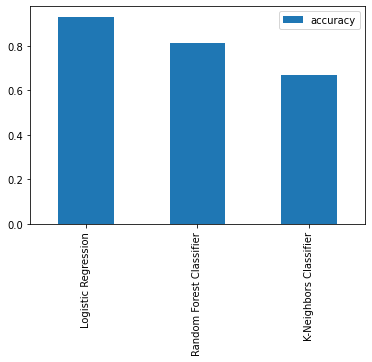

In [19]:
score = pd.DataFrame(score, index=['accuracy'])
score.T.plot.bar()

# Parameter Tuning

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## HyperParameters Tuning (by hand)

In [21]:
# Let's tune KNN
train_score = []
test_score = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbours
for i in neighbors:
    knn.set_params(n_neighbors=i)
    # Fit the algorithm
    knn.fit(x_train, y_train)
    # Update the training scores list
    train_score.append(knn.score(x_train, y_train))
    # Update the testing scores list
    test_score.append(knn.score(x_test, y_test))

In [22]:
train_score

[0.9820426487093153,
 0.8439955106621774,
 0.8473625140291807,
 0.8035914702581369,
 0.8092031425364759,
 0.7912457912457912,
 0.7890011223344556,
 0.7845117845117845,
 0.7755331088664422,
 0.7687991021324355,
 0.7542087542087542,
 0.7542087542087542,
 0.7575757575757576,
 0.7429854096520763,
 0.7564534231200898,
 0.745230078563412,
 0.7441077441077442,
 0.7373737373737373,
 0.7418630751964085,
 0.7396184062850729]

In [23]:
test_score

[0.6220095693779905,
 0.6842105263157895,
 0.6507177033492823,
 0.6674641148325359,
 0.6698564593301436,
 0.6889952153110048,
 0.6794258373205742,
 0.6746411483253588,
 0.6674641148325359,
 0.6770334928229665,
 0.6602870813397129,
 0.6555023923444976,
 0.6507177033492823,
 0.6555023923444976,
 0.65311004784689,
 0.6650717703349283,
 0.6650717703349283,
 0.6770334928229665,
 0.6746411483253588,
 0.6722488038277512]

Maximum KNN Score on the test data:68.90%


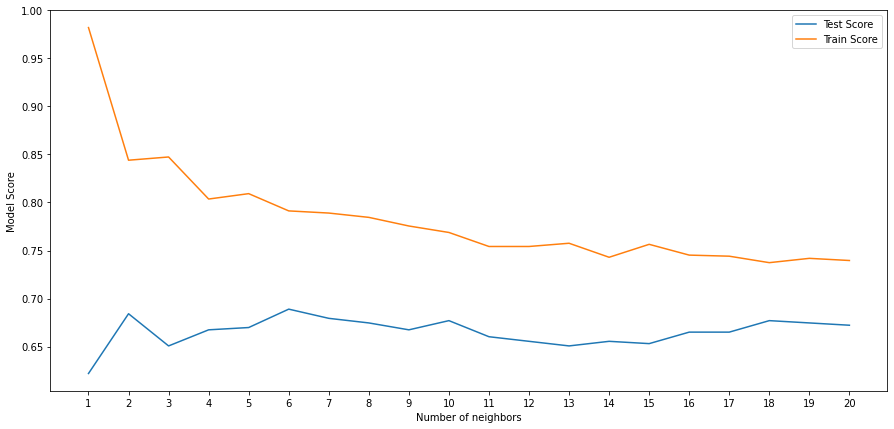

In [24]:
plt.figure(figsize=(15,7))
sns.lineplot(x=neighbors, y=test_score)
sns.lineplot(x=neighbors, y=train_score)
plt.xticks(ticks=np.arange(1,21,1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model Score')
plt.legend(['Test Score', 'Train Score'])
print(f'Maximum KNN Score on the test data:{max(test_score)*100:.2f}%')

## Hyperparameter tunning with RandomizedSearchCV

Tune the model:
* LogiticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [25]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear']}

# Tune LogisticRegression 
np.random.seed(42)

# setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [26]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [27]:
rs_log_reg.score(x_test, y_test)

0.9425837320574163

In [28]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [29]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 5}

In [30]:
# Evaluate the randomized search randomforestClassifier model
rs_rf.score(x_test, y_test)

0.8588516746411483

## Hyperparameter Tuning with GridSearchCV

LogisticRegression model provides the best scores, try and improve them again using GridSearchCV...

In [31]:
# Diffrent hyperparameters for our LogisticRegression model
log_reg_grid = {'C': np.logspace(-4,4,30),
                'solver': ['liblinear']}

# setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid= log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [32]:
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [33]:
gs_log_reg.score(x_test, y_test)

0.9425837320574163

## Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* classification report
* Precision
* Recall
* F1-Score

....and it would be great it cross-validaton was used where possible

to make comaparistions and evaluate our trained model, first we need to make predictions.

In [34]:
# make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)

In [35]:
y_preds

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [36]:
y_test

PassengerId
892     0
893     1
894     0
895     0
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Survived, Length: 418, dtype: int64

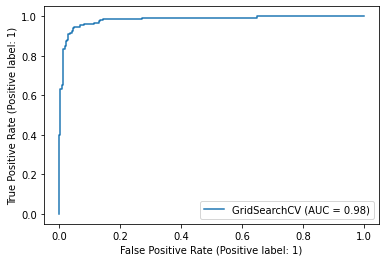

In [37]:
plot_roc_curve(gs_log_reg, x_test, y_test)

In [38]:
confusion_matrix(y_test, y_preds)

array([[250,  16],
       [  8, 144]])

Text(0.5, 6.0, 'True Label')

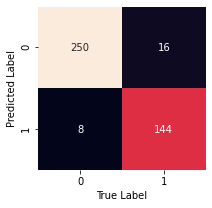

In [39]:
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False, fmt='.0f')
plt.ylabel('Predicted Label')
plt.xlabel('True Label')

In [40]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       266
           1       0.90      0.95      0.92       152

    accuracy                           0.94       418
   macro avg       0.93      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418



## Feature Importance 

for LogisticRegression model...

In [41]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=1.3738237958832638, solver='liblinear')

clf.fit(x_train, y_train)

LogisticRegression(C=1.3738237958832638, solver='liblinear')

In [42]:
clf.coef_

array([[-0.63455776, -2.57117481, -0.03234181, -0.30314428, -0.09376573,
         0.00263339,  0.85514816, -0.15357234]])

In [43]:
# Match coef's of features to columns
feature_dict = dict(zip(x_test.columns, list(clf.coef_[0])))
feature_dict

{'Pclass': -0.6345577550063597,
 'Sex': -2.5711748141844306,
 'Age': -0.032341812687402355,
 'SibSp': -0.30314428122498027,
 'Parch': -0.09376572867761772,
 'Fare': 0.002633392282202716,
 'Cabin': 0.8551481599385514,
 'Embarked': -0.1535723353326732}

<AxesSubplot:title={'center':'Feature Importance'}>

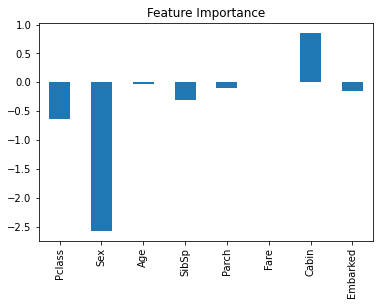

In [44]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False)

# Prediction

In [45]:
lgr = LogisticRegression()
# Diffrent hyperparameters for our LogisticRegression model
log_reg_grid = {'C': np.logspace(-4,4,30),
                'solver': ['liblinear']}

# setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(lgr,
                          param_grid= log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train)

# make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)

# save in data frame
survived = y.drop(columns='Survived')
survived['Survived'] = y_preds

# Dataframe save as .csv
survived.to_csv('mypredicteddata.csv', index=True, index_label='PassengerId')


Fitting 5 folds for each of 30 candidates, totalling 150 fits
